# TP FINAL - Captacion de Clientes

Integrantes:
<ol>
    <li> Fernando Brenko </li>
    <li> Cristian Gramajo </li>
    <li> Marilina Melo</li>
    <li> Jose Luis Corica </li>
</ol>

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt # Visualización de datos
#import seaborn as sns  # Visualización de datos

## Dataset de Captacion de Clientes

### Atributos

1. edad
2. tipo de trabajo 
3. marital : estado civil
4. educación
5. default: tiene préstamos impagos
6. balance: saldo anual promedio
7. housing: posee préstamo hipotecario
8. loan: tiene un préstamo personal

##### relacionado con la última campaña de marketing
9. contact: tipo de contacto
10. day: último día contactado (del mes)
11. month: último mes contactado (del año)
12. duration: duración del último contacto (en segundos)

##### otros atributos
13. campaign: número de contactos realizados para este cliente durante esta campaña
14. pdays: número de días que pasaron desde la última vez que el cliente fue contactado (-1 si el cliente no fue contactado con anterioridad)
15. previous: número de contactos previos
16. poutcome: resultado del último contacto

##### variable objetivo
17. y: variable target, indicada si el cliente se ha convertido en cliente del banco

In [109]:
#Cargamos el Dataset de train
dfTrain = pd.read_csv('C:/Users/Fer/Documents/Fernando/archivospython/banca_train.csv', sep=';')
dfTrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [110]:
#Cargamos el Dataset de test
dfTest = pd.read_csv('C:/Users/Fer/Documents/Fernando/archivospython/banca_test.csv', sep=';')
dfTest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [111]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [112]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [113]:
#Juntamos dataframede test y train para poder trabajarlos juntos luego separamos de nuevo 
# Unimos los dataframes con concat
df = pd.concat([dfTest, dfTrain])
# Mostramos el resultado
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [114]:
#describimos los datos del dataframe
print(df.describe())


                age        balance           day      duration      campaign   
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000  \
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [115]:
# Buscamos valores nulos en dataset 
nulos = df.isnull()
# mostrar el resultado
print(nulos)

         age    job  marital  education  default  balance  housing   loan   
0      False  False    False      False    False    False    False  False  \
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome

In [116]:
# Validamos Nulos nuevamente de otra manera por las dudas
nulos = df.isnull().sum()

# mostrar los valores nulos
print(nulos)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [117]:
#Antes de Transformar variables paso todo a un dataframe para uso de segmentacion de clientes
df_segmentacion = df

In [118]:
df_segmentacion

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [119]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [120]:
#Transformo variable marital de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['marital'], prefix='marital')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('marital',axis='columns')

In [121]:
#Transformo variable education de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['education'], prefix='education')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('education',axis='columns')

In [122]:
#Transformo variable job de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['job'], prefix='job')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('job',axis='columns')

In [123]:
#Transformo variable contact de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['contact'], prefix='contact')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('contact',axis='columns')

In [124]:
#Transformo variable poutcome de categorica a Binaria en dataset 
dummies = pd.get_dummies(df['poutcome'], prefix='poutcome')
#dummies
df = pd.concat([df, dummies], axis=1)
df=df.drop('poutcome',axis='columns')

In [125]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,no,19,oct,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,no,4789,yes,yes,11,may,220,1,339,...,False,False,False,True,False,False,True,False,False,False
2,35,no,1350,yes,no,16,apr,185,1,330,...,False,False,False,True,False,False,True,False,False,False
3,30,no,1476,yes,yes,3,jun,199,4,-1,...,False,False,False,False,False,True,False,False,False,True
4,59,no,0,yes,no,5,may,226,1,-1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,True,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,nov,456,2,-1,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,nov,1127,5,184,...,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,nov,508,4,-1,...,False,False,False,False,True,False,False,False,False,True


In [126]:
print("Número de observaciones por clase:")
print(df['y'].value_counts())
print("")

print("Porcentaje de observaciones por clase:")
print(100 * df['y'].value_counts(normalize=True))

Número de observaciones por clase:
y
no     43922
yes     5810
Name: count, dtype: int64

Porcentaje de observaciones por clase:
y
no     88.317381
yes    11.682619
Name: proportion, dtype: float64


In [127]:
#Cambiamos yes o NO por 1 o 0
df['default'] = df['default'].factorize(['no','yes'])[0]

#Cambiamos yes o NO por 1 o 0
df['housing'] = df['housing'].factorize(['no','yes'])[0]

#Cambiamos Y o N por 1 o 0
df['loan'] = df['loan'].factorize(['no','yes'])[0]

#Cambiamos Y o N por 1 o 0
df['y'] = df['y'].factorize(['no','yes'])[0]

In [128]:
#Buscamos distintos valores de la variable para crear diccionario
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [129]:
#creamos diccionario para reemplaar meses por numeros
Meses = {
'jan':1,  
'feb':2,
'mar':3,
'apr':4,
'may':5,
'jun':6,
'jul':7,
'aug':8,
'sep':9,
'oct':10,
'nov':11,
'dec':12
}

In [130]:
#Reemplazamos meses por numeros
df['month'] = df['month'].replace(Meses)

In [131]:
#validamos que se haya cambiado meses por numeros correctamente
df['month'].unique()

array([10,  5,  4,  6,  2,  8,  1,  7, 11,  9,  3, 12], dtype=int64)

In [132]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,10,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,0,4789,1,1,11,5,220,1,339,...,False,False,False,True,False,False,True,False,False,False
2,35,0,1350,1,0,16,4,185,1,330,...,False,False,False,True,False,False,True,False,False,False
3,30,0,1476,1,1,3,6,199,4,-1,...,False,False,False,False,False,True,False,False,False,True
4,59,0,0,1,0,5,5,226,1,-1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,True,False,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,11,456,2,-1,...,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,11,1127,5,184,...,False,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,11,508,4,-1,...,False,False,False,False,True,False,False,False,False,True


##### Algoritmo Regresion Logistica para Predecir la variable target

In [133]:
#Verificamos columnas para ver las de interes
print(df.columns)


Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [134]:
# Definimos las variables independientes y la variable dependiente
x = df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]
y = df['y']

In [135]:
# Creamos el modelo de regresión logística
Model_Logistica = LogisticRegression()

In [136]:
#Definimos Datos para Entregamiento y Test
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [137]:
#Entrenamos el Modelo
Model_Logistica.fit(x_train, y_train)

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
# Hacemos una predicción con dataframe de test
# Realizar predicciones sobre los datos de prueba
y_pred_Logistica = Model_Logistica.predict(x_test)
print(y_pred_Logistica)
print(x_test)

[0 0 0 ... 0 0 0]
       age  default  balance  housing  loan  day  month  duration  campaign   
35156   31        0      253        1     0    7      5       157         1  \
1159    31        0       62        1     0   18      5       175         1   
27530   30        0      973        1     0   21     11       156         2   
23074   48        0     2537        0     0   26      8       219         6   
45162   29        0      464        0     0    9     11       208         2   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
13882   31        0        0        1     1   10      7       114         1   
24245   46        0     -292        1     0   17     11       100         1   
12558   29        0      695        0     0    3      7        97         1   
25624   34        0        1        0     0   19     11       582         1   
26783   38        0       -3        0     0   20     11       251         2   

       pdays  ...  job_technician

In [139]:
#Metricas de evaluacion del Modelo Matriz de Confusion

confusion_matrix(y_test,y_pred_Logistica)

array([[8561,  197],
       [ 986,  203]], dtype=int64)

In [115]:
#Validacion Precision del modelo
Score_Logistica = Model_Logistica.score(x_test,y_test)
print("Score:", Score_Logistica)

#F1-score: Es una métrica que combina la precisión y el recall, calculando la media armónica entre ambos. Es útil cuando se desea considerar tanto la
#precisión como el recall en una única métrica.
f1_Logistica = f1_score(y_test, y_pred_Logistica)
print("F1-score:", f1_Logistica)

#Precisión (Accuracy): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias. 
#Se calcula como la suma de verdaderos positivos y verdaderos negativos dividido por el total de instancias.
accuracy_Logistica = accuracy_score(y_test, y_pred_Logistica)
print('Precisión del modelo:', accuracy_Logistica)

#Precisión (Precision): Mide la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas (verdaderos positivos más
#falsos positivos).
precision_Logistica = precision_score(y_test, y_pred_Logistica)
print("Precision:", precision_Logistica)

#Recall (Sensibilidad o Cobertura): Mide la proporción de verdaderos positivos sobre el total de instancias positivas (verdaderos positivos más falsos 
# negativos).
recall_Logistica = recall_score(y_test, y_pred_Logistica)
print("Recall:", recall_Logistica)

print(classification_report(y_test,y_pred_Logistica))



Score: 0.8810696692470091
F1-score: 0.2555066079295154
Precisión del modelo: 0.8810696692470091
Precision: 0.5075
Recall: 0.17073170731707318
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8758
           1       0.51      0.17      0.26      1189

    accuracy                           0.88      9947
   macro avg       0.70      0.57      0.60      9947
weighted avg       0.85      0.88      0.85      9947



#### Algoritmo Regresion Logistica eliminado variables contact, poutcome para probar relevancia

In [140]:
# Definimos las variables independientes y la variable dependiente
x1 = df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']]
y1 = df['y']


In [141]:
# Creamos el modelo de regresión logística
Model_Logistica1 = LogisticRegression()

In [142]:
#Definimos Datos para Entregamiento y Test
validation_size = 0.20
seed = 7
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=validation_size, random_state=seed)

In [143]:
#Entrenamos el Modelo
Model_Logistica1.fit(x_train1, y_train1)

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
# Hacemos una predicción con dataframe de test
# Realizar predicciones sobre los datos de prueba
y_pred_Logistica1 = Model_Logistica1.predict(x_test1)
print(y_pred_Logistica1)
print(x_test1)

[0 0 0 ... 0 0 0]
       age  default  balance  housing  loan  day  month  duration  campaign   
35156   31        0      253        1     0    7      5       157         1  \
1159    31        0       62        1     0   18      5       175         1   
27530   30        0      973        1     0   21     11       156         2   
23074   48        0     2537        0     0   26      8       219         6   
45162   29        0      464        0     0    9     11       208         2   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
13882   31        0        0        1     1   10      7       114         1   
24245   46        0     -292        1     0   17     11       100         1   
12558   29        0      695        0     0    3      7        97         1   
25624   34        0        1        0     0   19     11       582         1   
26783   38        0       -3        0     0   20     11       251         2   

       pdays  ...  job_entreprene

In [146]:
#Metricas de evaluacion del Modelo Matriz de Confusion

confusion_matrix(y_test,y_pred_Logistica1)

array([[8581,  177],
       [ 974,  215]], dtype=int64)

In [147]:
#Validacion Precision del modelo
Score_Logistica1 = Model_Logistica1.score(x_test1,y_test1)
print("Score:", Score_Logistica1)

#F1-score: Es una métrica que combina la precisión y el recall, calculando la media armónica entre ambos. Es útil cuando se desea considerar tanto la
#precisión como el recall en una única métrica.
f1_Logistica1 = f1_score(y_test1, y_pred_Logistica1)
print("F1-score:", f1_Logistica1)

#Precisión (Accuracy): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias. 
#Se calcula como la suma de verdaderos positivos y verdaderos negativos dividido por el total de instancias.
accuracy_Logistica1 = accuracy_score(y_test1, y_pred_Logistica1)
print('Precisión del modelo:', accuracy_Logistica1)

#Precisión (Precision): Mide la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas (verdaderos positivos más
#falsos positivos).
precision_Logistica1 = precision_score(y_test1, y_pred_Logistica1)
print("Precision:", precision_Logistica1)

#Recall (Sensibilidad o Cobertura): Mide la proporción de verdaderos positivos sobre el total de instancias positivas (verdaderos positivos más falsos 
# negativos).
recall_Logistica1 = recall_score(y_test1, y_pred_Logistica1)
print("Recall:", recall_Logistica1)

print(classification_report(y_test1,y_pred_Logistica1))


Score: 0.884286719613954
F1-score: 0.2719797596457938
Precisión del modelo: 0.884286719613954
Precision: 0.548469387755102
Recall: 0.1808242220353238
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8758
           1       0.55      0.18      0.27      1189

    accuracy                           0.88      9947
   macro avg       0.72      0.58      0.60      9947
weighted avg       0.86      0.88      0.86      9947



##### Algortimo Arboles de Decision (DecisionTreeClassifier)

In [148]:
# Creamos un arbol de decision con los datos de entrenamiento para entrenarlo 
ModelArbol = DecisionTreeClassifier(random_state=42)
ModelArbol.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [149]:
# Realizar predicciones sobre los datos de prueba
y_pred_arbol = ModelArbol.predict(x_test)
print(y_pred_arbol)
print(x_test)

[0 0 0 ... 0 0 0]
       age  default  balance  housing  loan  day  month  duration  campaign   
35156   31        0      253        1     0    7      5       157         1  \
1159    31        0       62        1     0   18      5       175         1   
27530   30        0      973        1     0   21     11       156         2   
23074   48        0     2537        0     0   26      8       219         6   
45162   29        0      464        0     0    9     11       208         2   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
13882   31        0        0        1     1   10      7       114         1   
24245   46        0     -292        1     0   17     11       100         1   
12558   29        0      695        0     0    3      7        97         1   
25624   34        0        1        0     0   19     11       582         1   
26783   38        0       -3        0     0   20     11       251         2   

       pdays  ...  job_technician

In [150]:
#Metricas de evaluacion del Modelo Matriz de Confusion

confusion_matrix(y_test,y_pred_arbol)

array([[8229,  529],
       [ 537,  652]], dtype=int64)

In [118]:
#Validacion Precision del modelo
Score_arbol = ModelArbol.score(x_test,y_test)
print("Score:", Score_arbol)

#F1-score: Es una métrica que combina la precisión y el recall, calculando la media armónica entre ambos. Es útil cuando se desea considerar tanto la
#precisión como el recall en una única métrica.
f1_arbol = f1_score(y_test, y_pred_arbol)
print("F1-score:", f1_arbol)

#Precisión (Accuracy): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias. 
#Se calcula como la suma de verdaderos positivos y verdaderos negativos dividido por el total de instancias.
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
print('Precisión del modelo:', accuracy_arbol)

#Precisión (Precision): Mide la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas (verdaderos positivos más
#falsos positivos).
precision_arbol = precision_score(y_test, y_pred_arbol)
print("Precision:", precision_arbol)

#Recall (Sensibilidad o Cobertura): Mide la proporción de verdaderos positivos sobre el total de instancias positivas (verdaderos positivos más falsos 
# negativos).
recall_arbol = recall_score(y_test, y_pred_arbol)
print("Recall:", recall_arbol)

print(classification_report(y_test,y_pred_arbol))

Score: 0.8928320096511511
F1-score: 0.550210970464135
Precisión del modelo: 0.8928320096511511
Precision: 0.5520745131244708
Recall: 0.5483599663582843
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8758
           1       0.55      0.55      0.55      1189

    accuracy                           0.89      9947
   macro avg       0.75      0.74      0.74      9947
weighted avg       0.89      0.89      0.89      9947



##### Algoritmo Arbol Random Forest

In [151]:
# Crear el clasificador de Random Forest
ModelRandomForest = RandomForestClassifier()

In [152]:
# Entrenar el modelo
ModelRandomForest.fit(x_train, y_train)

RandomForestClassifier()

In [154]:
# Realizar predicciones en el conjunto de prueba
y_pred_Forest = ModelRandomForest.predict(x_test)
print(y_pred_Forest)
print(x_test)



[0 0 0 ... 0 0 0]
       age  default  balance  housing  loan  day  month  duration  campaign   
35156   31        0      253        1     0    7      5       157         1  \
1159    31        0       62        1     0   18      5       175         1   
27530   30        0      973        1     0   21     11       156         2   
23074   48        0     2537        0     0   26      8       219         6   
45162   29        0      464        0     0    9     11       208         2   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
13882   31        0        0        1     1   10      7       114         1   
24245   46        0     -292        1     0   17     11       100         1   
12558   29        0      695        0     0    3      7        97         1   
25624   34        0        1        0     0   19     11       582         1   
26783   38        0       -3        0     0   20     11       251         2   

       pdays  ...  job_technician

In [155]:
#Metricas de evaluacion del Modelo Matriz de Confusion

confusion_matrix(y_test,y_pred_Forest)

array([[8556,  202],
       [ 650,  539]], dtype=int64)

In [156]:
#Validacion Precision del modelo
Score_Forest = ModelRandomForest.score(x_test,y_test)
print("Score:", Score_Forest)

#F1-score: Es una métrica que combina la precisión y el recall, calculando la media armónica entre ambos. Es útil cuando se desea considerar tanto la
#precisión como el recall en una única métrica.
f1_Forest = f1_score(y_test, y_pred_Forest)
print("F1-score:", f1_Forest)

#Precisión (Accuracy): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias. 
#Se calcula como la suma de verdaderos positivos y verdaderos negativos dividido por el total de instancias.
accuracy_Forest = accuracy_score(y_test, y_pred_Forest)
print('Precisión del modelo:', accuracy_Forest)

#Precisión (Precision): Mide la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas (verdaderos positivos más
#falsos positivos).
precision_Forest = precision_score(y_test, y_pred_Forest)
print("Precision:", precision_Forest)

#Recall (Sensibilidad o Cobertura): Mide la proporción de verdaderos positivos sobre el total de instancias positivas (verdaderos positivos más falsos 
# negativos).
recall_Forest = recall_score(y_test, y_pred_Forest)
print("Recall:", recall_Forest)

print(classification_report(y_test,y_pred_Forest))

Score: 0.9143460339800945
F1-score: 0.5585492227979274
Precisión del modelo: 0.9143460339800945
Precision: 0.7273954116059379
Recall: 0.4533221194280908
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8758
           1       0.73      0.45      0.56      1189

    accuracy                           0.91      9947
   macro avg       0.83      0.72      0.76      9947
weighted avg       0.91      0.91      0.91      9947



##### Algotimo Redes Neuronales Multicapa

In [94]:
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [96]:
#Entrno Modelo
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=500)

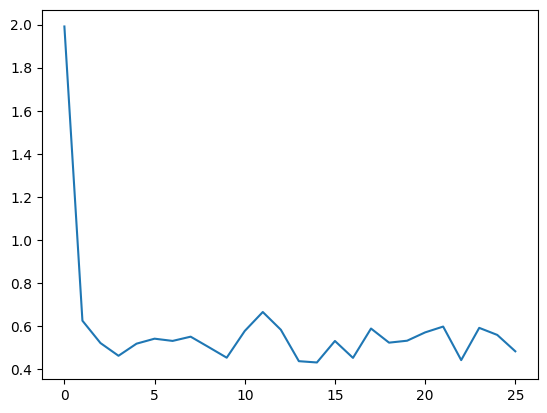

In [97]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.show()

In [101]:
#Predicciones del Modelo
y_pred_mlp = mlp.predict(x_test)
print(y_pred_mlp)
print(x_test)

[0 0 0 ... 0 0 0]
       age  default  balance  housing  loan  day  month  duration  campaign   
35156   31        0      253        1     0    7      5       157         1  \
1159    31        0       62        1     0   18      5       175         1   
27530   30        0      973        1     0   21     11       156         2   
23074   48        0     2537        0     0   26      8       219         6   
45162   29        0      464        0     0    9     11       208         2   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
13882   31        0        0        1     1   10      7       114         1   
24245   46        0     -292        1     0   17     11       100         1   
12558   29        0      695        0     0    3      7        97         1   
25624   34        0        1        0     0   19     11       582         1   
26783   38        0       -3        0     0   20     11       251         2   

       pdays  ...  job_technician

In [104]:
#Metricas de evaluacion del Modelo Matriz de Confusion

confusion_matrix(y_test,y_pred_mlp)

array([[8719,   39],
       [1087,  102]], dtype=int64)

In [120]:
#Validacion Precision del modelo
Score_mlp = mlp.score(x_test,y_test)
print("Score:", Score_mlp)

#F1-score: Es una métrica que combina la precisión y el recall, calculando la media armónica entre ambos. Es útil cuando se desea considerar tanto la
#precisión como el recall en una única métrica.
f1_mlp = f1_score(y_test, y_pred_mlp)
print("F1-score:", f1_mlp)

#Precisión (Accuracy): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias. 
#Se calcula como la suma de verdaderos positivos y verdaderos negativos dividido por el total de instancias.
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print('Precisión del modelo:', accuracy_mlp)

#Precisión (Precision): Mide la proporción de verdaderos positivos sobre el total de instancias clasificadas como positivas (verdaderos positivos más
#falsos positivos).
precision_mlp = precision_score(y_test, y_pred_mlp)
print("Precision:", precision_mlp)

#Recall (Sensibilidad o Cobertura): Mide la proporción de verdaderos positivos sobre el total de instancias positivas (verdaderos positivos más falsos 
# negativos).
recall_mlp = recall_score(y_test, y_pred_mlp)
print("Recall:", recall_mlp)

print(classification_report(y_test,y_pred_mlp))

Score: 0.8868000402131296
F1-score: 0.15338345864661654
Precisión del modelo: 0.8868000402131296
Precision: 0.723404255319149
Recall: 0.08578637510513036
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8758
           1       0.72      0.09      0.15      1189

    accuracy                           0.89      9947
   macro avg       0.81      0.54      0.55      9947
weighted avg       0.87      0.89      0.85      9947



##### Algortimo kMeans para segmentar clientes de acuerdo a su edad y balance para proponer campaña de marketing

In [24]:
df_segmentacion

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,no,19,oct,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,no,4789,yes,yes,11,may,220,1,339,...,False,False,False,True,False,False,True,False,False,False
2,35,no,1350,yes,no,16,apr,185,1,330,...,False,False,False,True,False,False,True,False,False,False
3,30,no,1476,yes,yes,3,jun,199,4,-1,...,False,False,False,False,False,True,False,False,False,True
4,59,no,0,yes,no,5,may,226,1,-1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,True,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,nov,456,2,-1,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,nov,1127,5,184,...,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,nov,508,4,-1,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
# Eliminar registros que ya son clientes del banco (y=Yes)
#df_segmentacion = df.drop(df_segmentacion[df_segmentacion['y'] == 'yes'].index)

In [85]:
# Selecciono columnas sobre las que aplicaré el clustering y las separo en la variable X
columns = ['age','balance']
X = np.array(df_segmentacion[columns])

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

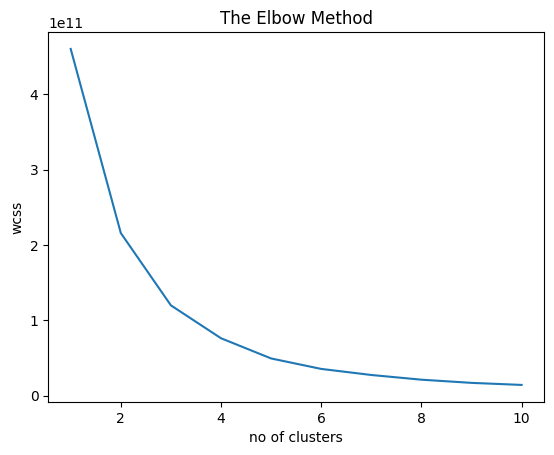

In [86]:
# Grafico para encontrar el "punto de codo" en la curva. Punto Elbow = 4. Aplicaré el algoritmo K-Means con 4 clusters.
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [87]:
# Aplico K-Means para 5 clusters
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


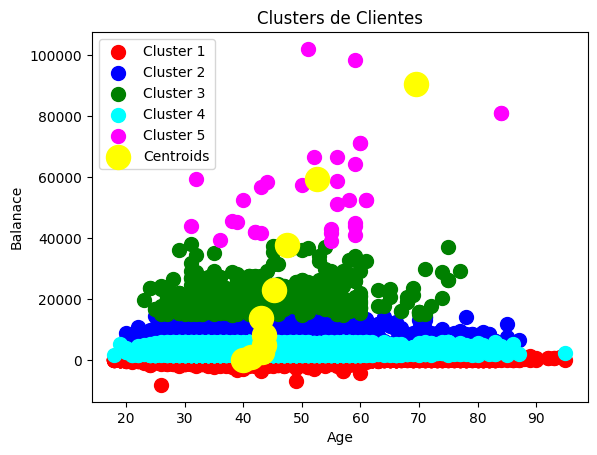

In [88]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Age')
plt.ylabel('Balanace')
plt.legend()
plt.show()

##### Algortimo kMeans para segmentar clientes de acuerdo a su edad y duracion de llamada para proponer campaña de marketing

In [89]:
# Selecciono columnas sobre las que aplicaré el clustering y las separo en la variable X
columns = ['age','duration']
X = np.array(df_segmentacion[columns])

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

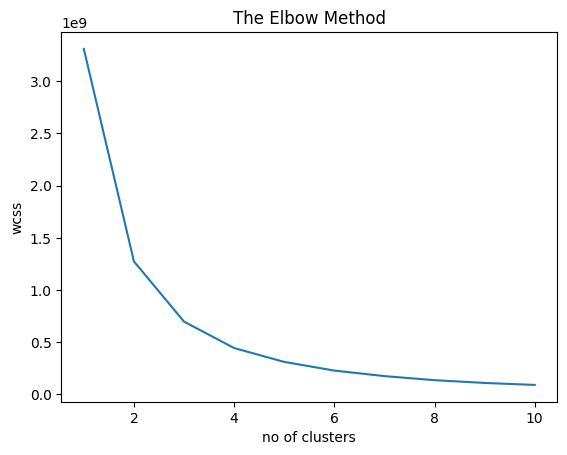

In [90]:
# Grafico para encontrar el "punto de codo" en la curva. Punto Elbow = 4. Aplicaré el algoritmo K-Means con 4 clusters.
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [99]:
# Aplico K-Means para 5 clusters
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


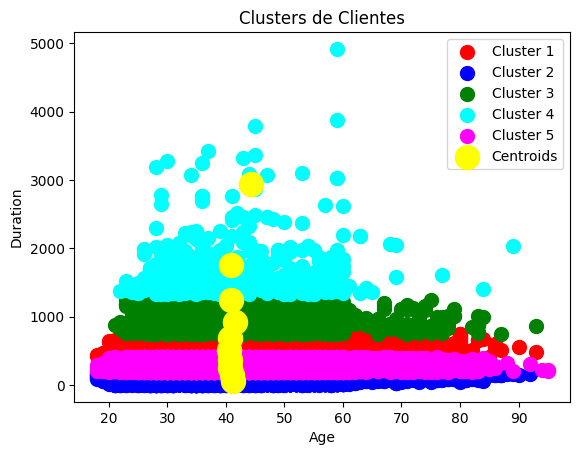

In [100]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.legend()
plt.show()